# Building a Neural Network

In [ ]:
#From 2.Data notebook

import torch
import torchvision
from torchvision import transforms , datasets

train = datasets.MNIST("",
                       train = True,
                       download = True, 
                       transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("",
                      train = False,
                      download = True, 
                      transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train,batch_size =10,shuffle =True)
testset = torch.utils.data.DataLoader(test,batch_size =10,shuffle =True)

### Importing pytorch Neural Network Libraries



*   torch.nn for OOP
*   torch.nn.functional for functional programming



In [ ]:
import torch.nn as nn
import torch.nn.functional as F

### Building a Neural Network

* fc - Fully connected layer
* Linear :
Applies a linear transformation to the incoming data:


```
 y = xA^T + b
```



Args:
* in_features: size of each input sample
* out_features: size of each output sample
* bias: If set to False, the layer will not learn an additive bias. (Default = True)


**Relu:**

The Rectified Linear Unit is the most commonly used activation function in deep learning models. The function returns 0 if it receives any negative input, but for any positive value  x  it returns that value back. So it can be written as  f(x)=max(0,x) .

Graphically it looks like this

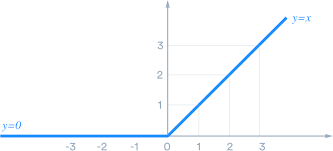


In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    """
    for every fully connected layer, we need three layers of 64 neurons for
    hidden layers , so the output is 64
    """
    self.fc1 = nn.Linear(28*28,64)
    """
    second layer takes input from the output of first fully connected layer
    so the input to second layer is 64
    """
    self.fc2 = nn.Linear(64,64)
    self.fc3 = nn.Linear(64,64)
    """
    we have ten classes (0 to 9) so for the final the number of output neurons
    is equal to 10
    """
    self.fc4 = nn.Linear(64,10)

  def forward(self,x):
    """
      Feed forward network
    """
    """
      pass input to first layer and use Rectified Linear Unit for activation 
      function on the output of first layer.
      
    """
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    """
    Applies a softmax followed by a logarithm.

    While mathematically equivalent to log(softmax(x)), doing these two
    operations separately is slower, and numerically unstable. This function
    uses an alternative formulation to compute the output and gradient correctly.

    dim :  A dimension along which log_softmax will be computed.

    """
    return F.log_softmax(x,dim =1)

    

  

###Testing Network

In [ ]:
net = Net()
X= torch.rand((28,28)).view([1,28*28])
"""
X= torch.rand((28,28)).view([-1,28*28])
use this for any input (dimension)
"""
output = net(X)

Predictions - output

* We didnt initialize weights randomly
* grad_fn = Gradient Function

In [ ]:
output

tensor([[-2.3593, -2.3567, -2.2077, -2.2505, -2.2086, -2.3239, -2.4350, -2.2943,
         -2.3475, -2.2662]], grad_fn=<LogSoftmaxBackward>)